# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

You should consider upgrading via the 'C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import os 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



### 1.   Load Dataset

In [47]:
root_path = '../final/'


In [48]:
def get_csv_files(root):
    csv_files_dict = {'customers': [], 'transactions':[]}
    
    for file in os.listdir(root):
        if file.endswith(".csv"):
            if 'customers' in file:
                csv_files_dict['customers'].append(os.path.join(root, file))
            elif 'transactions' in file:
                csv_files_dict['transactions'].append(os.path.join(root, file))
    return csv_files_dict


In [49]:
data_dict = get_csv_files(root_path)

def merge_transaction():
    dfs = (pd.read_csv(transaction, delimiter='|') for transaction in data_dict['transactions'])
    return pd.concat(dfs, ignore_index=True)

df = merge_transaction()

C:\Users\shres\AppData\Local\Temp\ipykernel_14536\1969431227.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True)


In [50]:

df.to_csv('transactions.csv', index=False)

In [51]:
transaction_df = pd.read_csv('transactions.csv')

### 2. Explore Dataset

In [52]:
transaction_df.shape

(4260904, 10)

In [53]:
transaction_df.describe()

cc_num      acct_num     unix_time           amt      is_fraud  \
count  4.260904e+06  4.260904e+06  4.260904e+06  4.260904e+06  4.260904e+06   
mean   3.916811e+17  4.913599e+11  1.620228e+09  6.898790e+01  1.181439e-03   
std    1.267805e+18  2.897749e+11  3.795228e+07  1.618467e+02  3.435177e-02   
min    6.040027e+10  2.348758e+09  1.546261e+09  1.000000e+00  0.000000e+00   
25%    1.800618e+14  2.568452e+11  1.587482e+09  9.100000e+00  0.000000e+00   
50%    3.524238e+15  4.719310e+11  1.626431e+09  4.449000e+01  0.000000e+00   
75%    4.604409e+15  7.518511e+11  1.654918e+09  8.158000e+01  0.000000e+00   
max    4.986227e+18  9.993899e+11  1.672492e+09  4.130053e+04  1.000000e+00   

          merch_lat    merch_long  
count  4.260904e+06  4.260904e+06  
mean   3.735276e+01 -9.247610e+01  
std    5.504630e+00  1.741603e+01  
min    1.859001e+01 -1.603677e+02  
25%    3.370138e+01 -9.903072e+01  
50%    3.819365e+01 -8.727445e+01  
75%    4.120567e+01 -7.966098e+01  
max    6.577610e+01 -6.724632e+01

In [54]:
for col in transaction_df.columns:
    print(f'unique number of values for \"{col}\": {len(transaction_df[col].unique())}')

unique number of values for "cc_num": 983
unique number of values for "acct_num": 983
unique number of values for "trans_num": 4260904
unique number of values for "unix_time": 4114752
unique number of values for "category": 14
unique number of values for "amt": 81218
unique number of values for "is_fraud": 2
unique number of values for "merchant": 21977
unique number of values for "merch_lat": 3767589
unique number of values for "merch_long": 4031685


In [55]:
len(transaction_df['acct_num'].unique())

983

In [56]:
customer_df = pd.read_csv(data_dict["customers"][0], delimiter="|")


In [12]:
acc_not_listed = []
for acc_num in transaction_df['acct_num'].unique().tolist():
    if acc_num in customer_df['acct_num'].unique().tolist():
        continue
    else:
        acc_not_listed.append(acc_num)

In [13]:
for acc_num in customer_df['acct_num'].unique().tolist():
    if acc_num in transaction_df['acct_num'].unique().tolist():
        continue
    else:
        acc_not_listed.append(acc_num)

In [14]:
len(acc_not_listed)

17

In [15]:
cc_not_listed = []
for acc_num in transaction_df['cc_num'].unique().tolist():
    if acc_num in customer_df['cc_num'].unique().tolist():
        continue
    else:
        cc_not_listed.append(acc_num)

cc_not_listed

[]

In [16]:
for acc_num in customer_df['cc_num'].unique().tolist():
    if acc_num in transaction_df['cc_num'].unique().tolist():
        continue
    
    else:
        cc_not_listed.append(acc_num)

In [17]:
len(cc_not_listed)

17

In [18]:
customer_df.describe()

cc_num          zip          lat         long      city_pop  \
count  1.000000e+03   1000.00000  1000.000000  1000.000000  1.000000e+03   
mean   3.656964e+17  51786.20900    37.422795   -92.505277  2.867058e+05   
std    1.227337e+18  29933.13195     5.574397    17.510134  5.329632e+05   
min    6.040027e+10   1571.00000    19.589300  -159.368300  1.050000e+02   
25%    1.800353e+14  27528.25000    33.712500   -99.159475  2.022950e+04   
50%    3.517359e+15  49016.00000    38.431750   -87.156600  6.728250e+04   
75%    4.538733e+15  78599.00000    41.220300   -80.018850  2.499788e+05   
max    4.986227e+18  99705.00000    64.780500   -68.244800  2.906700e+06   

           acct_num  
count  1.000000e+03  
mean   4.995849e+11  
std    2.894933e+11  
min    2.348758e+09  
25%    2.620636e+11  
50%    4.915295e+11  
75%    7.571575e+11  
max    9.993899e+11

In [19]:
# customer_df.columns
len(customer_df['acct_num'].unique())

1000

In [57]:
merged_df = pd.merge(transaction_df, customer_df, on=['acct_num', 'cc_num'])

In [58]:

merged_df = merged_df.sort_values(by='unix_time')

# merged_df

In [21]:
# merged_df = pd.read_csv('merged_data.csv')

In [59]:
merged_df.columns

Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob'],
      dtype='object')

In [26]:
unique_credit_cards = transaction_df.groupby('acct_num')['cc_num'].unique().reset_index()


In [29]:
# desired_records = customer_df[customer_df['cc_num'].isin(not_listed)]


In [ ]:
# desired_records

In [ ]:
customere_cc_desired_records = customer_df[customer_df['cc_num'].isin(not_listed)]
customere_cc_desired_records

In [ ]:
customere_acc_desired_records = customer_df[customer_df['acct_num'].isin(not_listed)]
customere_acc_desired_records

### Remarks
- Insight of 983 customers are present in the transaction dataset.
- No transaction history of 17 customers are present


In [ ]:
merged_df.head()

In [ ]:
merged_df.shape

In [ ]:
len(merged_df['job'].unique())

In [ ]:
import matplotlib.pyplot as plt

job_counts = merged_df['job'].value_counts()
# Plot the bar graph
plt.figure(figsize=(8, 6))
job_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Jobs')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
merged_df['is_fraud'].value_counts()

### Working on Merged DataFrame

In [23]:
merged_df = pd.read_csv('merged_data.csv')

In [24]:
merged_df.shape

(4260904, 24)

In [25]:
merged_df['is_fraud'].value_counts()

is_fraud
0    4255870
1       5034
Name: count, dtype: int64

In [ ]:
4255870/4260904, 5034/4260904

In [26]:
merged_df['job'].unique()

array(['Accounting technician', 'Seismic interpreter',
       'Programme researcher, broadcasting/film/video',
       'Insurance risk surveyor', 'Solicitor',
       'Therapist, speech and language', 'Pathologist', 'Energy engineer',
       'Call centre manager', 'Associate Professor', 'Buyer, retail',
       'Early years teacher', 'Petroleum engineer',
       'IT sales professional', 'Engineer, mining', 'Surveyor, quantity',
       'Psychologist, counselling', 'Research scientist (maths)',
       'IT consultant', 'Senior tax professional/tax inspector',
       'Engineer, civil (contracting)', 'Sports development officer',
       'Acupuncturist', 'Horticultural therapist', 'Sports coach',
       'Designer, exhibition/display', 'Paediatric nurse',
       'Research officer, government', 'Interior and spatial designer',
       'Social research officer, government',
       'Architectural technologist', 'Programmer, systems',
       'Statistician', 'Chief Financial Officer',
       'Local go

In [10]:
merged_df.columns

Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob'],
      dtype='object')

In [32]:
from datetime import datetime



In [33]:
# Convert Unix timestamps to datetime objects
merged_df['datetime'] = pd.to_datetime(merged_df['unix_time'], unit='s')

# Extract year, month, day, hour, minute, and second
merged_df['year'] = merged_df['datetime'].dt.year
merged_df['month'] = merged_df['datetime'].dt.month
merged_df['day'] = merged_df['datetime'].dt.day
merged_df['hour'] = merged_df['datetime'].dt.hour
merged_df['minute'] = merged_df['datetime'].dt.minute
merged_df['second'] = merged_df['datetime'].dt.second


In [34]:
merged_df.head()

Unnamed: 0            cc_num      acct_num  \
326123      3600515   213140433504880  280173576486   
2276137     1624030      571945341956   41019526172   
2475846     1827323   372853533998243  467846623753   
1450355     1253609      676305937770  661384884419   
2630160     1950815  3501842933598479  272098683812   

                                trans_num   unix_time       category     amt  \
326123   a410f9d17a82d616d248d0e65c58420f  1546261219  gas_transport  209.83   
2276137  ba8e37ae12a9b7fe62ed317523c1b702  1546261223  gas_transport  110.47   
2475846  bf3e9ab9554652fcd8e0a50ba8dd1d91  1546261297  gas_transport    9.53   
1450355  f303afd08e32a5046250692754d73c6c  1546261363  gas_transport  199.74   
2630160  69f35ab9a3bb604d0b4730172cbc6dec  1546261447  gas_transport  122.21   

         is_fraud                  merchant  merch_lat  ...  city_pop  \
326123          0              Peterson LLC  39.665260  ...    213013   
2276137         0  Perez, Young and Stanley  29.833943  ...     31086   
2475846         0            Trujillo-Foley  29.400998  ...   1595797   
1450355         0            Hatfield Group  34.317132  ...     46239   
2630160         0               Clark Group  33.607133  ...   1263321   

                                              job         dob  \
326123                          Fisheries officer  1989-03-06   
2276137  Conservation officer, historic buildings  1956-05-05   
2475846                       Geologist, wellsite  1985-04-12   
1450355             Designer, television/film set  1929-11-07   
2630160                 Publishing rights manager  1982-09-19   

                   datetime  year month day hour  minute  second  
326123  2018-12-31 13:00:19  2018    12  31   13       0      19  
2276137 2018-12-31 13:00:23  2018    12  31   13       0      23  
2475846 2018-12-31 13:01:37  2018    12  31   13       1      37  
1450355 2018-12-31 13:02:43  2018    12  31   13       2      43  
2630160 2018-12-31 13:04:07  2018    12  31   13       4       7  

[5 rows x 31 columns]

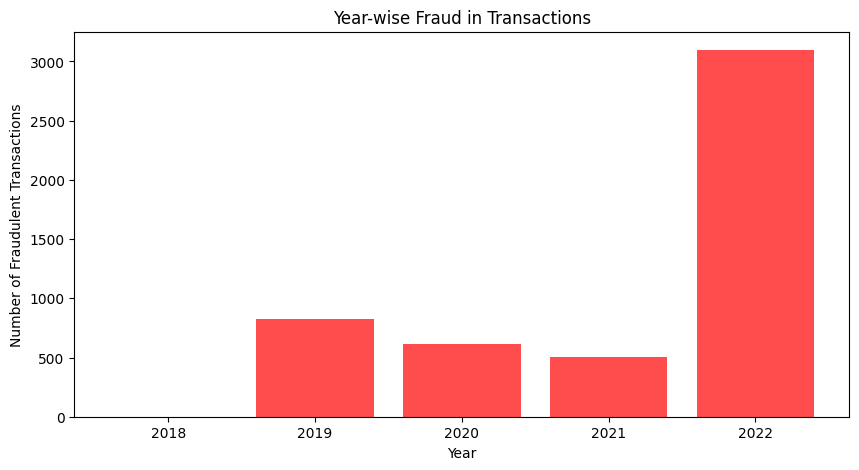

In [35]:
# Group by year and aggregate the fraud data
yearly_fraud = merged_df.groupby('year')['is_fraud'].sum().reset_index()

# Plot the year-wise fraud data
plt.figure(figsize=(10, 5))
plt.bar(yearly_fraud['year'], yearly_fraud['is_fraud'], color='red', alpha=0.7)
plt.title('Year-wise Fraud in Transactions')
plt.xlabel('Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(yearly_fraud['year'])  # Ensure each year is labeled on the x-axis
plt.show()

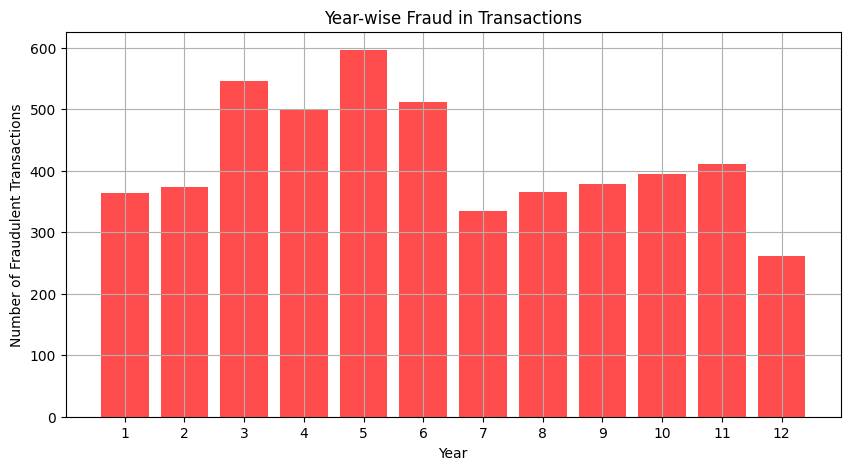

In [36]:
# Group by year and aggregate the fraud data
yearly_fraud = merged_df.groupby('month')['is_fraud'].sum().reset_index()

# Plot the year-wise fraud data
plt.figure(figsize=(10, 5))
plt.bar(yearly_fraud['month'], yearly_fraud['is_fraud'], color='red', alpha=0.7)
plt.title('Year-wise Fraud in Transactions')
plt.xlabel('Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(yearly_fraud['month'])  # Ensure each year is labeled on the x-axis
plt.show()

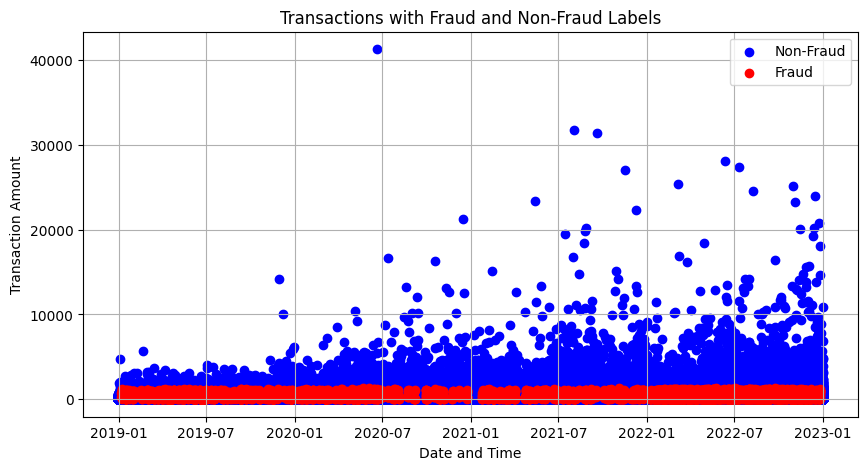

In [46]:
# Plot the fraud and non-fraud transactions with labels
plt.figure(figsize=(10, 5))

# Plot non-fraud transactions
non_fraud = merged_df[merged_df['is_fraud'] == 0]
plt.scatter(non_fraud['datetime'], non_fraud['amt'], color='blue', label='Non-Fraud')

# Plot fraud transactions
fraud = merged_df[merged_df['is_fraud'] == 1]
plt.scatter(fraud['datetime'], fraud['amt'], color='red', label='Fraud')

# Customize the plot
plt.title('Transactions with Fraud and Non-Fraud Labels')
plt.xlabel('Date and Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

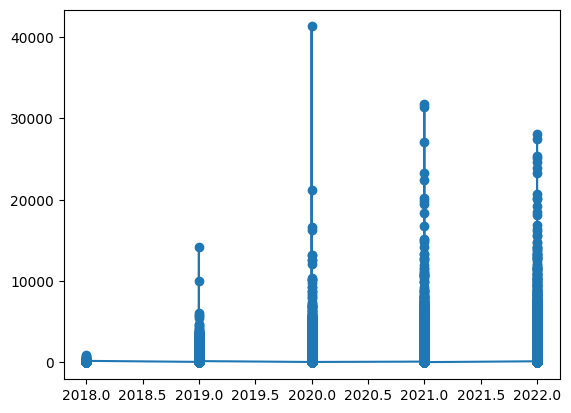

In [17]:
plt.plot(merged_df.year, merged_df['amt'], marker='o')


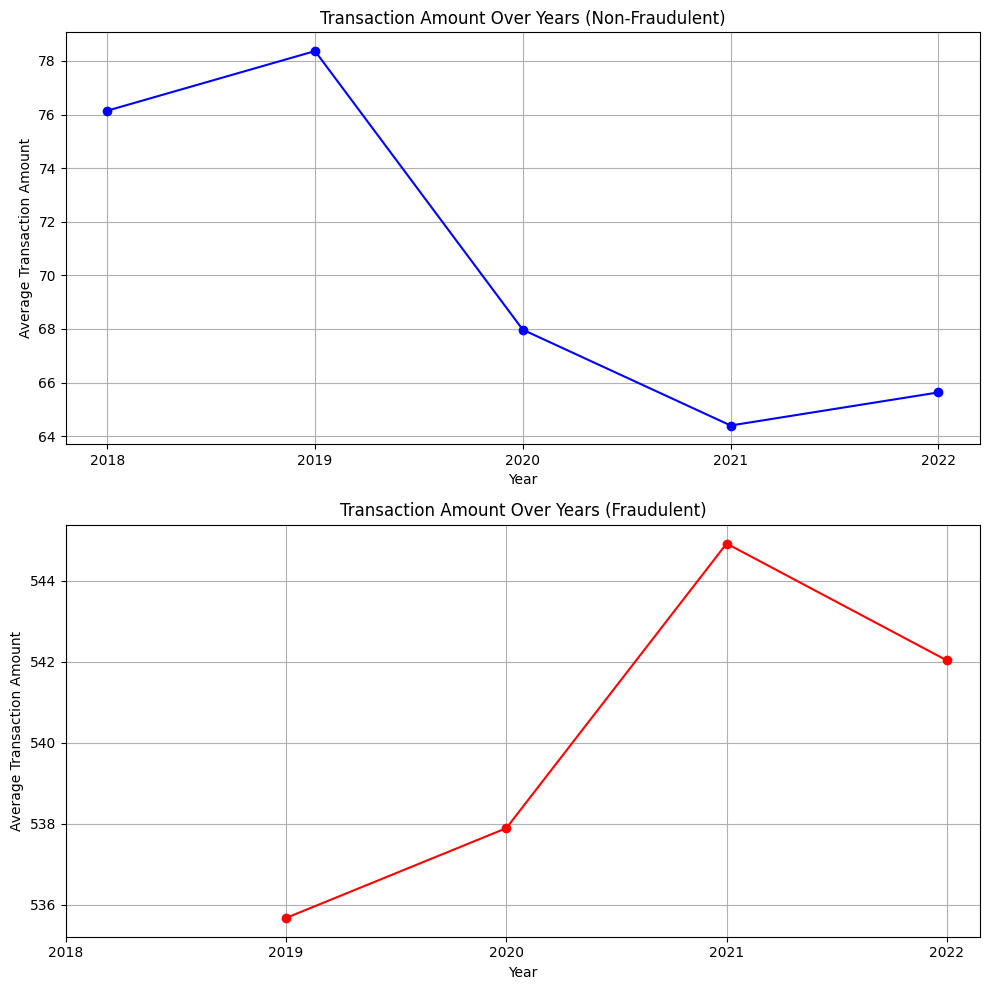

In [18]:
# Group by year and calculate sum of transaction amounts for both fraudulent and non-fraudulent transactions
yearly_transactions = merged_df.groupby([merged_df['datetime'].dt.year, 'is_fraud'])['amt'].mean().unstack()

# Create two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot transaction amount over years for non-fraudulent transactions
axes[0].plot(yearly_transactions.index, yearly_transactions[0], marker='o', color='blue')
axes[0].set_title('Transaction Amount Over Years (Non-Fraudulent)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Transaction Amount')
axes[0].grid(True)
axes[0].set_xticks(yearly_transactions.index)  # Ensure each year is labeled on the x-axis

# Plot transaction amount over years for fraudulent transactions
axes[1].plot(yearly_transactions.index, yearly_transactions[1], marker='o', color='red')
axes[1].set_title('Transaction Amount Over Years (Fraudulent)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Transaction Amount')
axes[1].grid(True)
axes[1].set_xticks(yearly_transactions.index)  # Ensure each year is labeled on the x-axis

plt.tight_layout()
plt.show()

In [19]:
# Create a cross-tabulation of fraud and non-fraud transactions for each year
cross_tab = pd.crosstab(merged_df['year'], merged_df['is_fraud'])

# Print the cross-tabulation
print("Cross-tabulation of Fraudulent and Non-Fraudulent Transactions by Year:")
print(cross_tab)

Cross-tabulation of Fraudulent and Non-Fraudulent Transactions by Year:
is_fraud        0     1
year                   
2018         1080     0
2019       859423   824
2020       856771   610
2021       859269   504
2022      1679327  3096


In [20]:
merged_df.columns

Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'datetime', 'year', 'month',
       'day', 'hour', 'minute', 'second'],
      dtype='object')

In [96]:
df_cleaned = merged_df.copy()

In [38]:
cols_to_remove = ['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num','merch_lat', 'merch_long', 'unix_time', 'merchant', 
 'lat', 'long', 'ssn', 'first', 'last', 'street', 'city', 'state', 'zip','city_pop', 'dob', 'datetime', 'job']

In [39]:
df_cleaned.drop(columns=cols_to_remove, inplace=True)

In [40]:
df_cleaned.columns

Index(['category', 'amt', 'is_fraud', 'gender', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

In [41]:
sampled_df = df_cleaned[df_cleaned['year'] == 2022]

sampled_df

category     amt  is_fraud gender  year  month  day  hour  minute  \
552330      home  149.40         0      F  2022      1    1     1       0   
2230991     home   88.24         0      M  2022      1    1     1       1   
3241021     home  106.05         0      F  2022      1    1     1       1   
1511496     home   93.31         0      M  2022      1    1     1       2   
28991       home  175.48         0      M  2022      1    1     1       2   
...          ...     ...       ...    ...   ...    ...  ...   ...     ...   
1423499   travel   24.43         0      M  2022     12   31    12      59   
2017224   travel  119.89         0      F  2022     12   31    12      59   
2869121   travel   21.51         0      M  2022     12   31    12      59   
1666563   travel   12.84         0      F  2022     12   31    12      59   
2655597   travel   56.67         0      M  2022     12   31    12      59   

         second  
552330       33  
2230991      46  
3241021      48  
1511496      35  
28991        54  
...         ...  
1423499      28  
2017224      29  
2869121      29  
1666563      36  
2655597      42  

[1682423 rows x 10 columns]

In [42]:
sampled_df

category     amt  is_fraud gender  year  month  day  hour  minute  \
552330      home  149.40         0      F  2022      1    1     1       0   
2230991     home   88.24         0      M  2022      1    1     1       1   
3241021     home  106.05         0      F  2022      1    1     1       1   
1511496     home   93.31         0      M  2022      1    1     1       2   
28991       home  175.48         0      M  2022      1    1     1       2   

         second  
552330       33  
2230991      46  
3241021      48  
1511496      35  
28991        54

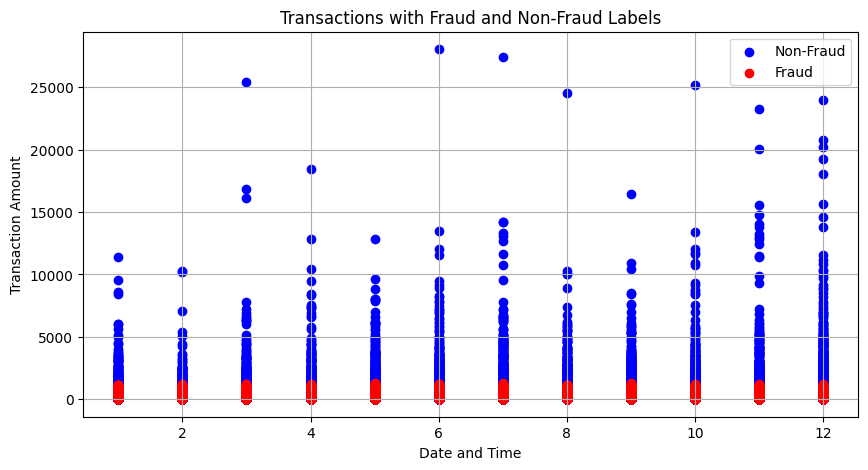

In [43]:
# Plot the fraud and non-fraud transactions with labels
plt.figure(figsize=(10, 5))

# Plot non-fraud transactions
non_fraud = sampled_df[sampled_df['is_fraud'] == 0]
plt.scatter(non_fraud['month'], non_fraud['amt'], color='blue', label='Non-Fraud')

# Plot fraud transactions
fraud = sampled_df[sampled_df['is_fraud'] == 1]
plt.scatter(fraud['month'], fraud['amt'], color='red', label='Fraud')

# Customize the plot
plt.title('Transactions with Fraud and Non-Fraud Labels')
plt.xlabel('Date and Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
sampled_df.shape

(1682423, 10)

In [45]:
sampled_df = pd.get_dummies(sampled_df, prefix=['category', 'gender'])

In [46]:
sampled_df.columns

Index(['amt', 'is_fraud', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M'],
      dtype='object')

In [47]:
# sampled_df.drop(columns=[ 'is_fraud', 'year',], inplace=True)

In [49]:
def optimize_df(df):
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            if col_type == 'int64':
                df[col] = pd.to_numeric(df[col], downcast='integer')
            elif col_type == 'float64':
                df[col] = pd.to_numeric(df[col], downcast='float')
        else:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
            else:
                df[col] = df[col].astype('object')
    return df

# Optimize DataFrame
df_optimized = optimize_df(sampled_df)

In [50]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682423 entries, 552330 to 2655597
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1682423 non-null  float64
 1   is_fraud                 1682423 non-null  int8   
 2   year                     1682423 non-null  int32  
 3   month                    1682423 non-null  int32  
 4   day                      1682423 non-null  int32  
 5   hour                     1682423 non-null  int32  
 6   minute                   1682423 non-null  int32  
 7   second                   1682423 non-null  int32  
 8   category_entertainment   1682423 non-null  bool   
 9   category_food_dining     1682423 non-null  bool   
 10  category_gas_transport   1682423 non-null  bool   
 11  category_grocery_net     1682423 non-null  bool   
 12  category_grocery_pos     1682423 non-null  bool   
 13  category_health_fitness  1682423 non-null 

In [51]:
# sampled_df = df_optimized[df_optimized['year'] == 2022]

# sampled_df

In [52]:
sampled_df.head()

amt  is_fraud  year  month  day  hour  minute  second  \
552330   149.40         0  2022      1    1     1       0      33   
2230991   88.24         0  2022      1    1     1       1      46   
3241021  106.05         0  2022      1    1     1       1      48   
1511496   93.31         0  2022      1    1     1       2      35   
28991    175.48         0  2022      1    1     1       2      54   

         category_entertainment  category_food_dining  ...  category_home  \
552330                    False                 False  ...           True   
2230991                   False                 False  ...           True   
3241021                   False                 False  ...           True   
1511496                   False                 False  ...           True   
28991                     False                 False  ...           True   

         category_kids_pets  category_misc_net  category_misc_pos  \
552330                False              False              False   
2230991               False              False              False   
3241021               False              False              False   
1511496               False              False              False   
28991                 False              False              False   

         category_personal_care  category_shopping_net  category_shopping_pos  \
552330                    False                  False                  False   
2230991                   False                  False                  False   
3241021                   False                  False                  False   
1511496                   False                  False                  False   
28991                     False                  False                  False   

         category_travel  gender_F  gender_M  
552330             False      True     False  
2230991            False     False      True  
3241021            False      True     False  
1511496            False     False      True  
28991              False     False      True  

[5 rows x 24 columns]

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [55]:
X_scaled = scaler.fit_transform(sampled_df.drop(columns=[ 'is_fraud', 'year']))

C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [56]:
# Solution
from sklearn.decomposition import PCA

In [57]:
pca = PCA(5)

In [58]:
pca.fit(X_scaled)

PCA(n_components=5)

In [59]:
pc_variance_ratio = pca.explained_variance_ratio_
pc_variance_ratio

array([0.09825175, 0.09143658, 0.06346972, 0.05688035, 0.05422261])

In [60]:
pc_list = [f'PC{i}' for i in list(range(1, len(pc_variance_ratio) + 1))]
pc_list

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [61]:
pc_loadings = dict(zip(pc_list, pca.components_))

In [62]:
loadings_df = pd.DataFrame(pc_loadings)
loadings_df.shape

(22, 5)

In [64]:
loadings_df.insert(0,'feature_names', sampled_df.drop(columns=[ 'is_fraud', 'year']).columns)
loadings_df

feature_names       PC1       PC2       PC3       PC4       PC5
0                       amt  0.005710  0.046837 -0.001310  0.019264 -0.003590
1                     month -0.574746 -0.158086 -0.226130 -0.059023 -0.019240
2                       day -0.052990 -0.028178 -0.148916  0.166641  0.436509
3                      hour  0.418511  0.154032 -0.433860 -0.077202 -0.023114
4                    minute -0.000098  0.003449 -0.018945  0.020455 -0.039033
5                    second  0.004352 -0.005775  0.013649 -0.069499  0.026937
6    category_entertainment  0.005702 -0.007704 -0.083952 -0.015914 -0.012473
7      category_food_dining -0.022765 -0.019121 -0.084494 -0.034464  0.048176
8    category_gas_transport  0.303499  0.046520 -0.161988 -0.011464  0.022030
9      category_grocery_net  0.183349  0.095820 -0.148188  0.083646  0.046961
10     category_grocery_pos  0.233667  0.078913 -0.232375 -0.033671 -0.104248
11  category_health_fitness -0.057914 -0.038038  0.003867 -0.022754 -0.027496
12            category_home  0.144775 -0.064582  0.566805  0.560040  0.066667
13       category_kids_pets -0.060902  0.019577  0.354404 -0.751287  0.070954
14        category_misc_net  0.126319  0.038354 -0.129916 -0.059865  0.025570
15        category_misc_pos  0.098178  0.030002 -0.075344 -0.003565 -0.055287
16   category_personal_care -0.341454 -0.019470 -0.248154  0.218729 -0.607158
17    category_shopping_net  0.050103  0.049927 -0.044585  0.038881 -0.030474
18    category_shopping_pos  0.030138  0.038797 -0.056488  0.019386  0.141000
19          category_travel -0.262011 -0.119773 -0.283305  0.103108  0.616622
20                 gender_F -0.185067  0.671996  0.050307  0.049557  0.057617
21                 gender_M  0.185067 -0.671996 -0.050307 -0.049557 -0.057617

In [65]:
pca_df = pd.DataFrame(pca.transform(X_scaled))

In [66]:
pca_df.shape


(1682423, 5)

In [67]:
from sklearn.ensemble import IsolationForest

In [68]:
ifr = IsolationForest(random_state=0).fit(pca_df)

C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [69]:
pca_df.shape

(1682423, 5)

In [70]:
preds = ifr.predict(pca_df)

C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [91]:

sampled_df



amt  is_fraud  year  month  day  hour  minute  second  \
552330   149.40         0  2022      1    1     1       0      33   
2230991   88.24         0  2022      1    1     1       1      46   
3241021  106.05         0  2022      1    1     1       1      48   
1511496   93.31         0  2022      1    1     1       2      35   
28991    175.48         0  2022      1    1     1       2      54   
...         ...       ...   ...    ...  ...   ...     ...     ...   
1423499   24.43         0  2022     12   31    12      59      28   
2017224  119.89         0  2022     12   31    12      59      29   
2869121   21.51         0  2022     12   31    12      59      29   
1666563   12.84         0  2022     12   31    12      59      36   
2655597   56.67         0  2022     12   31    12      59      42   

         category_entertainment  category_food_dining  ...  category_home  \
552330                    False                 False  ...           True   
2230991                   False                 False  ...           True   
3241021                   False                 False  ...           True   
1511496                   False                 False  ...           True   
28991                     False                 False  ...           True   
...                         ...                   ...  ...            ...   
1423499                   False                 False  ...          False   
2017224                   False                 False  ...          False   
2869121                   False                 False  ...          False   
1666563                   False                 False  ...          False   
2655597                   False                 False  ...          False   

         category_kids_pets  category_misc_net  category_misc_pos  \
552330                False              False              False   
2230991               False              False              False   
3241021               False              False              False   
1511496               False              False              False   
28991                 False              False              False   
...                     ...                ...                ...   
1423499               False              False              False   
2017224               False              False              False   
2869121               False              False              False   
1666563               False              False              False   
2655597               False              False              False   

         category_personal_care  category_shopping_net  category_shopping_pos  \
552330                    False                  False                  False   
2230991                   False                  False                  False   
3241021                   False                  False                  False   
1511496                   False                  False                  False   
28991                     False                  False                  False   
...                         ...                    ...                    ...   
1423499                   False                  False                  False   
2017224                   False                  False                  False   
2869121                   False                  False                  False   
1666563                   False                  False                  False   
2655597                   False                  False                  False   

         category_travel  gender_F  gender_M  
552330             False      True     False  
2230991            False     False      True  
3241021            False      True     False  
1511496            False     False      True  
28991              False     False      True  
...                  ...       ...       ...  
1423499             True     False      True  
2017224             True      True     False  
2869121             True     Fals

In [50]:
preds

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
count = np.count_nonzero(preds == -1)

print(count)

629612


In [ ]:
sampled_df.iloc[:6]

In [ ]:
df_cleaned.shape

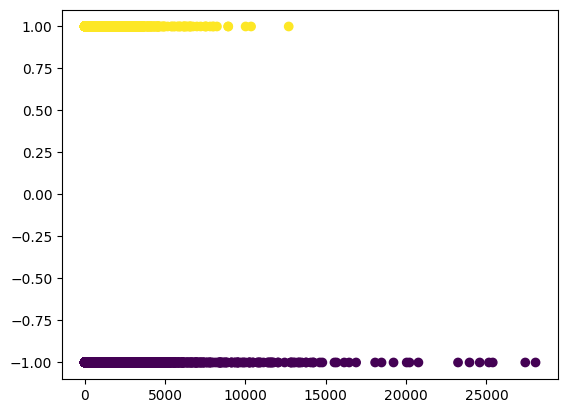

In [73]:
plt.scatter(sampled_df['amt'], preds, c=preds, cmap='viridis')

In [75]:
anomalies = sampled_df[preds == -1]


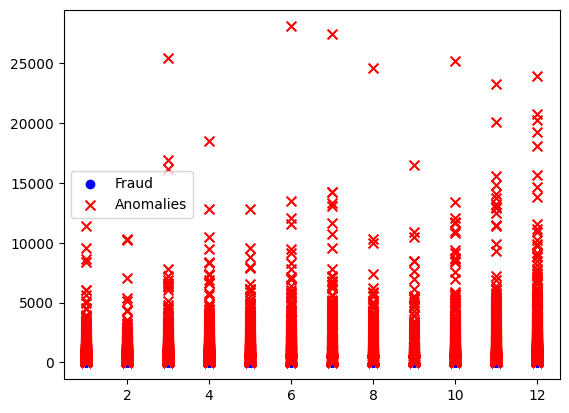

In [81]:

plt.scatter(fraud['month'], fraud['amt'], color='blue', label='Fraud')

# plt.scatter(sampled_df.iloc[:, 0], sampled_df.iloc[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies['month'], anomalies['amt'], c='r', marker='x', s=50, label='Anomalies')
# plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

In [ ]:
sampled_df['is_fraud'].value_counts()

In [ ]:
indices = np.where(preds == -1)[0]
indices

In [ ]:
# Create a scatter plot of latitude and longitude coordinates
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['long'], merged_df['lat'], color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# plt.title('Scatter Plot of Latitude and Longitude Coordinates')
# for i, txt in enumerate(merged_df['city']):
#     plt.annotate(txt, (merged_df['long'][i], merged_df['lat'][i]))  # Annotate each point with the location name
plt.grid(True)
plt.show()

In [ ]:

plt.show()

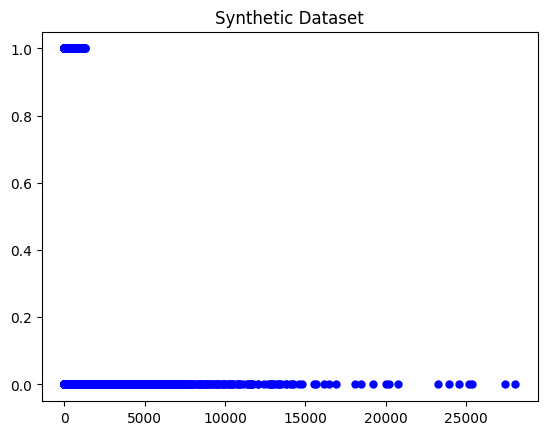

In [55]:
from sklearn.cluster import DBSCAN
plt.scatter(sampled_df.iloc[:, 0], sampled_df.iloc[:, 1], c='b', marker='o', s=25)
plt.title("Synthetic Dataset")
plt.show()

In [58]:
sampled_df.columns

Index(['amt', 'is_fraud', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M'],
      dtype='object')

In [ ]:
# dbscan = DBSCAN(eps=1, min_samples=41)  # Increase eps
# labels = dbscan.fit_predict(sampled_df)

C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [67]:
anomalies = sampled_df[labels == -1]
# anomalies = X[labels == -1]


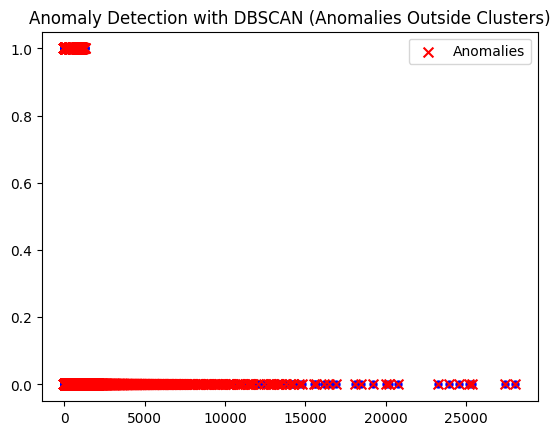

In [68]:
plt.scatter(sampled_df.iloc[:, 0], sampled_df.iloc[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='r', marker='x', s=50, label='Anomalies')
plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

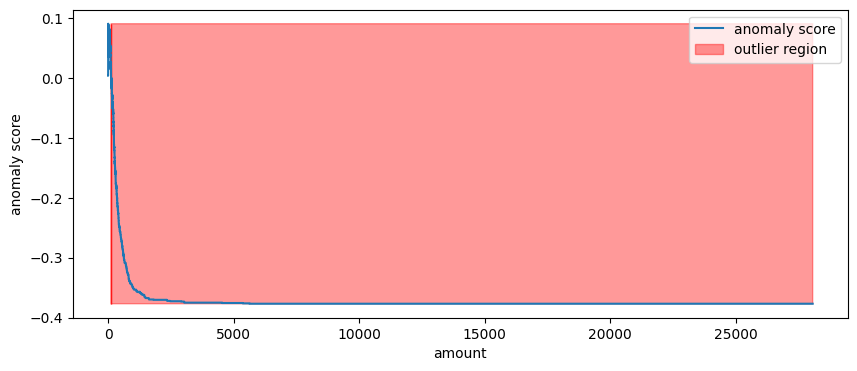

In [86]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(sampled_df['amt'].values.reshape(-1, 1))

xx = np.linspace(sampled_df['amt'].min(), sampled_df['amt'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)

outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('amount')
plt.show();

In [90]:
np.min(anomaly_score), np.max(anomaly_score)

(-0.37699170492246037, 0.09056955912485337)

In [84]:
sampled_df['amt'].describe()

count    1.682423e+06
mean     6.651055e+01
std      1.757003e+02
min      1.000000e+00
25%      8.750000e+00
50%      3.832000e+01
75%      7.886000e+01
max      2.805851e+04
Name: amt, dtype: float64

In [92]:
sampled_df.columns

Index(['amt', 'is_fraud', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M'],
      dtype='object')

In [93]:
test_df = sampled_df.copy()

C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

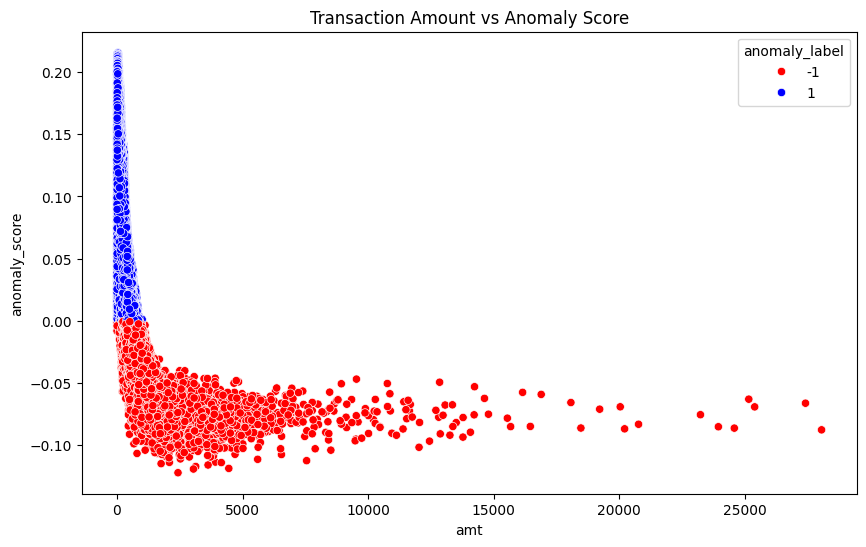

             amt  is_fraud  year  month  day  hour  minute  second  \
658697    558.56         0  2022      1    1     1      15       1   
1908540   428.16         0  2022      1    1     1      15       2   
3781431   449.21         0  2022      1    1     1      26       1   
3403272   613.57         0  2022      1    1     2       2      44   
2422754   578.66         0  2022      1    1     3       5      56   
...          ...       ...   ...    ...  ...   ...     ...     ...   
284162   1004.86         0  2022     12   31    12      18       9   
3155641   919.19         0  2022     12   31    12      28      57   
1974349   927.55         0  2022     12   31    12      39      20   
3816168   857.10         0  2022     12   31    12      39      25   
3229495   510.00         0  2022     12   31    12      52       1   

         category_entertainment  category_food_dining  ...  category_misc_net  \
658697                    False                  True  ...              False 

In [95]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# # Load data
# df = pd.read_csv('transactions.csv')

# Feature selection
features = ['amt', 'hour', 'minute', 'second']
X = test_df[features]

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)

# Predict anomaly scores and labels
test_df['anomaly_score'] = model.decision_function(X)
test_df['anomaly_label'] = model.predict(X)

# Analyze results
anomalies = test_df[test_df['anomaly_label'] == -1]

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_df, x='amt', y='anomaly_score', hue='anomaly_label', palette={1: 'blue', -1: 'red'})
plt.title('Transaction Amount vs Anomaly Score')
plt.show()

# Print anomalies
print(anomalies)


In [98]:
test_df = df_cleaned.copy()

In [99]:
test_df.shape

(4260904, 31)

In [100]:
test_df.columns

Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'datetime', 'year', 'month',
       'day', 'hour', 'minute', 'second'],
      dtype='object')

In [107]:
from sklearn.model_selection import train_test_split

# Assuming 'account_id' is the column you want to stratify by
stratify_col = test_df['is_fraud']
sampled_df, _ = train_test_split(test_df, test_size=0.9, stratify=stratify_col, random_state=42)
# print(sampled_df.head())

C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [128]:
sampled_df.shape

(426090, 31)

In [129]:
test_df = sampled_df.copy()

In [138]:
test_df = test_df.sort_values(by='unix_time')


In [139]:
test_df.columns



Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'datetime', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'time_since_last'],
      dtype='object')

In [152]:
test_df['time_since_last'] = test_df.groupby('acct_num')['datetime'].diff().dt.total_seconds().fillna(0)


In [153]:
test_df

Unnamed: 0               cc_num      acct_num  \
2475846     1827323      372853533998243  467846623753   
1332797      884819     3590608548186741  917933349154   
3077297     2991834      180052963863967  841139412121   
911468      2642716     3517152391029294    8210493341   
3201172     2263946        4603754821459  750737122054   
...             ...                  ...           ...   
1782491     1176013  4519701815891368290    3418322859   
2305740     1649666        4470465689694  664358045781   
3944236     3341721         566871568911  452102880184   
3637816     2664986      180075851268619  406674938298   
3912454     3180025     4772233060463333  630254100367   

                                trans_num   unix_time       category     amt  \
2475846  bf3e9ab9554652fcd8e0a50ba8dd1d91  1546261297  gas_transport    9.53   
1332797  0722ccc9f5e5c180d0587337e7f89adf  1546261754  gas_transport  111.17   
3077297  703faf392b4d75d9a04baf97975bc5cd  1546261773  gas_transport   57.93   
911468   a5f396918088931ef4f9310052579bdf  1546262327  gas_transport   58.71   
3201172  e24736faa767394989ac67e0a5b7d59f  1546262506  gas_transport  100.41   
...                                   ...         ...            ...     ...   
1782491  8eb99f4481f82d3bb07e0c23d49a890a  1672491365         travel   80.79   
2305740  e2cc40d05305bddd3bd3dfe9094b452f  1672491367         travel   51.32   
3944236  6305ccebd84d46f3d50824a441028689  1672491485         travel   24.57   
3637816  22ee1ce0faeca3159028f4075ba8b45b  1672491536         travel    4.91   
3912454  06c638b8a8b99bbecc0873dba0a5ad12  1672491539         travel    5.58   

         is_fraud                    merchant  merch_lat  ...  \
2475846         0              Trujillo-Foley  29.400998  ...   
1332797         0              Griffin-Harper  30.638381  ...   
3077297         0   Harding, Smith and Taylor  38.481922  ...   
911468          0      Shaw, Clark and Murphy  38.982534  ...   
3201172         0             Miller and Sons  39.772720  ...   
...           ...                         ...        ...  ...   
1782491         0             Orozco and Sons  37.118149  ...   
2305740         0                     Ray Ltd  34.986255  ...   
3944236         0  Curtis, Hogan and Williams  39.265079  ...   
3637816         0                   Allen Inc  46.932059  ...   
3912454         0             Patrick-Wallace  37.951814  ...   

                                                       job         dob  \
2475846                                Geologist, wellsite  1985-04-12   
1332797                             Chief Strategy Officer  1994-10-20   
3077297                                  Nurse, children's  1981-07-12   
911468                                  Engineer, chemical  1998-03-13   
3201172  Scientist, clinical (histocompatibility and im...  1992-05-21   
...                                                    ...         ...   
1782491                      Operational investment banker  2001-07-21   
2305740                          Radiographer, therapeutic  1967-06-12   
3944236                            Horticulturist, amenity  1941-03-08   
3637816                                       Tour manager  1992-07-29   
3912454                               Nurse, mental health  2003-07-29   

                   datetime  year month day hour minute  second  \
2475846 2018-12-31 13:01:37  2018    12  31   13      1      37   
1332797 2018-12-31 13:09:14  2018    12  31   13      9      14   
3077297 2018-12-31 13:09:33  2018    12  31   13      9      33   
911468  2018-12-31 13:18:47  2018    12  31   13     18      47   
3201172 2018-12-31 13:21:46  2018    12  31   13     21      46   
...                     ...   ...   ...  ..  ...    ...     ...   
1782491 2022-12-31 12:56:05  2022    12  31   12     56       5   
2305740 2022-12-31 12:56:07  2022    12  31   12     56       7   
3944236 2022-12-31 12:58:05  2022    12  31   12     58       5   
3637816 202

C:\Users\shres\AppData\Local\Temp\ipykernel_15952\2794205032.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\shres\Documents\University\2ndSem\MachineLearningAndAlgorithms\Assignments\Assignment1\resources\experiments\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


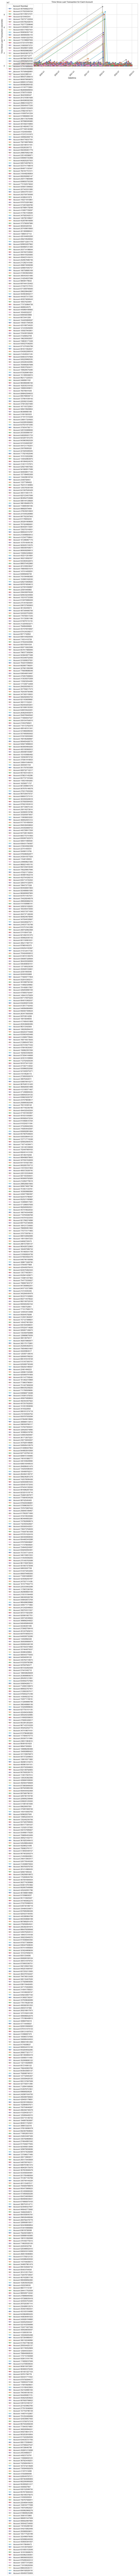

In [143]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(14, 7))

# Plot time since last transaction for each account
for acct in test_df['acct_num'].unique():
    subset = test_df[test_df['acct_num'] == acct]
    plt.plot(subset['datetime'], subset['time_since_last'], marker='o', label=f'Account {acct}')

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Time Since Last Transaction (seconds)')
plt.title('Time Since Last Transaction for Each Account')
plt.legend(title='Account Number')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [145]:
test_df.columns

Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'datetime', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'time_since_last'],
      dtype='object')

In [151]:
test_df['count_last_day'] = test_df.groupby('acct_num')['trans_num'].rolling('1D', on='datetime').count().reset_index(level=0, drop=True)


ValueError: invalid on specified as datetime, must be a column (of DataFrame), an Index or None

In [154]:
test_df['avg_transaction_amount'] = test_df.groupby('acct_num')['amt'].transform('mean')


In [156]:

test_df['avg_transaction_amount_category_wise'] = test_df.groupby(['acct_num', 'category'])['amt'].transform('mean')

# account_category_avg_transaction = test_df.groupby(['acct_num', 'category'])['amt'].mean()


In [159]:
test_df['merchant_frequency'] = test_df.groupby(['acct_num', 'merchant'])['trans_num'].transform('count')


count    426090.000000
mean          1.059354
std           0.270074
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: merchant_frequency, dtype: float64

In [157]:
test_df.columns

Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'datetime', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'time_since_last',
       'avg_transaction_amount', 'avg_transaction_amount_category_wise'],
      dtype='object')

In [ ]:
824/859423, 610/856771, 504/859269, 3096/1679327


In [ ]:
merged_df['year'].value_counts()

In [ ]:
non_fradulent_transaction = merged_df[merged_df['is_fraud']==0]

In [ ]:
remove_list = non_fradulent_transaction.iloc[:4000000]['Unnamed: 0'].to_list()

In [ ]:
len(transaction_df['acct_num'].unique())

In [ ]:
resampled_data =  merged_df[~merged_df['Unnamed: 0'].isin(remove_list)]


In [ ]:
resampled_data.shape

In [ ]:
len(resampled_data['job'].unique())

In [ ]:
resampled_data['is_fraud'].value_counts()

In [ ]:
resampled_data[resampled_data['is_fraud']==1]['job'].value_counts()

In [ ]:
resampled_data.columns

In [ ]:
resampled_data.info()

In [ ]:
cleaned_df = resampled_data.copy()

In [ ]:
cleaned_df.drop(columns= [ 'Unnamed: 0', 'trans_num', 'cc_num', 'merchant', 'ssn', 'first', 'last','street', 'city','state','zip', 'city_pop','dob'], inplace=True ) 

In [ ]:
# cleaned_df.columns

### 3. Explore Target variable

In [ ]:
target = ''

### 4. Explore Variables of Interest

### 5. Prepare Data

In [ ]:
df_cleaned = df.copy()

### 6. Split Dataset

In [ ]:
X_train =
X_val =
X_test =

y_train =
y_val =
y_test =

### 7. Baseline Model

In [ ]:
y_central =

In [ ]:
train_perf =
valid_perf =
test_perf =

### 8. Train Machine Learning Model

In [ ]:
model =

### 9. Assess Model Performance

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =